In [3]:
#set the wd to file location
setwd(getSrcDirectory(function(){})[1])

# dataClean Notebook
The purpose of this file is to define a function which cleans the data by removing columns. It may be expanded to increase the scope. It requires the following files:
<ul>
    <li> 01-vehicles-download.csv </li>
</ul>
It will produce the following files
<ul>
    <li> 02-vehicles-cleaned.csv </li>
</ul>
    

In [7]:
#Import Necessary libraries
library('tidyverse')
library('dplyr')
library('forcats')

In [8]:
#Read Data
vehicles = read.csv('./01-vehicles-download.csv',header=TRUE)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


## cleanData Function
The cleanData function takes the following inputs:
<ul>
    <li> df: the dataframe to be cleaned </li>
    <li>  vars: a list of vars to drop </li>
</ul>
The cleanData function creates a new dataframe object which is a copy of the original data frame with the following changes:
<ul>
    <li> it does not contain the columns in the vars list </li>
    <li> prices are within (1000,200000) </li>
    <li> observations with 1234 style prices are dropped </li>
    <li> missing valued rows are dropped </li>

</ul>

In [9]:
cleanData = function(df,vars){
    cleanedVehicles <<- df[ , !(names(df) %in% vars)]%>% #remove certain columns 
    filter(price>1000, price < 200000)%>% #remove cars outside of (1000,1000000)
    filter(price != 1234,price != 12345, price != 123456, price != 54321) %>% #remoce cars with prices following a pattern
    filter(odometer < 500000) %>%
    drop_na()%>% #drop missing values
    mutate_if(sapply(., is.character), as.factor) %>% #factorizes <chr> variables
    filter(year >= 2000) %>%
    distinct()  # drops duplicate values
  
    
    return(cleanedVehicles)
    }

## Applying the cleanData function and saving the data
The above function is applied to our dataframe, then the data is saved

In [10]:
#applying the cleanData function to the vehicles dataset to filter for variables
filteredVars = c('id','url','region','region_url','VIN','image_url','description','lat','long','county','posting_date','model')

cleanVehicles = cleanData(vehicles,filteredVars)

In [11]:
#save the data
write.csv(cleanedVehicles, '02-vehicles-clean.csv',row.names=FALSE)
head(cleanVehicles)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,33590,2014,gmc,good,8 cylinders,gas,57923,clean,other,,,pickup,white,al
2,22590,2010,chevrolet,good,8 cylinders,gas,71229,clean,other,,,pickup,blue,al
3,39590,2020,chevrolet,good,8 cylinders,gas,19160,clean,other,,,pickup,red,al
4,30990,2017,toyota,good,8 cylinders,gas,41124,clean,other,,,pickup,red,al
5,15000,2013,ford,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black,al
6,27990,2012,gmc,good,8 cylinders,gas,68696,clean,other,4wd,,pickup,black,al


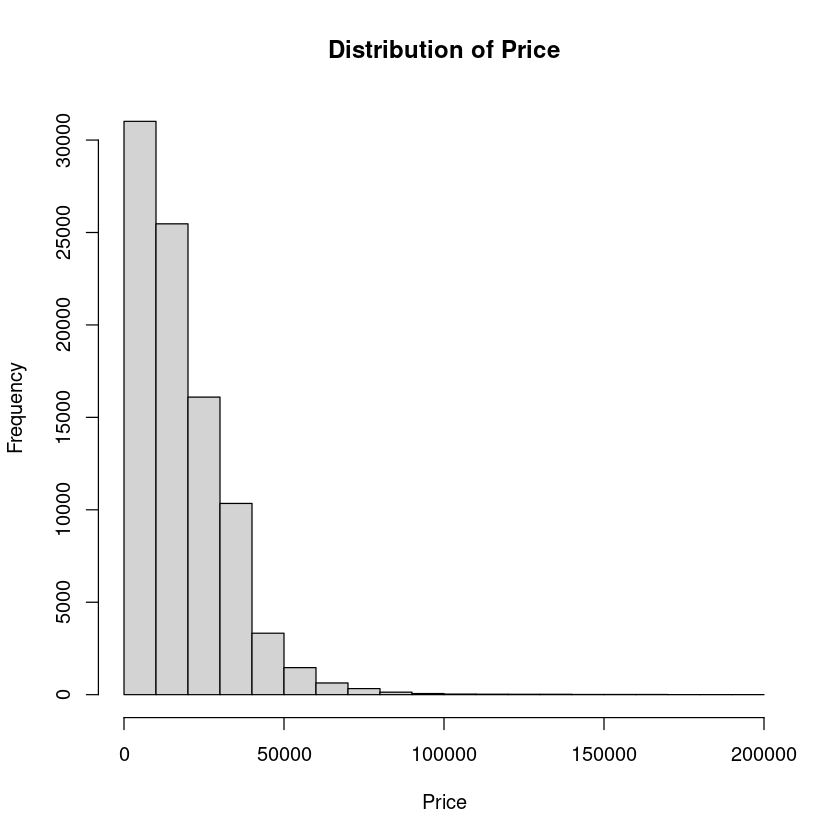

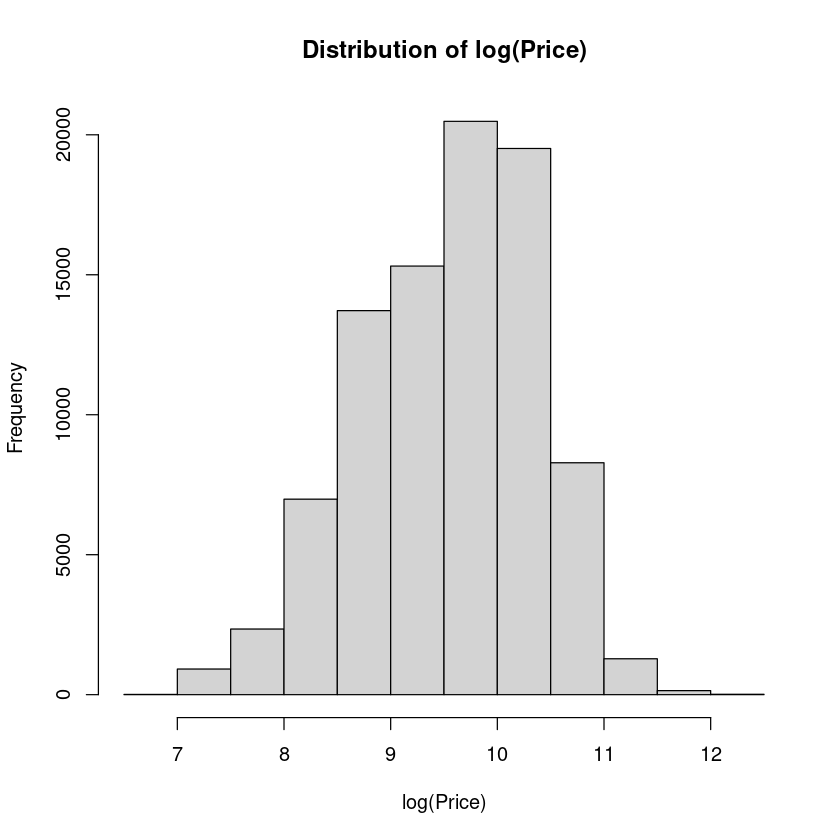

In [12]:
#Creating plots showing price
hist(cleanVehicles$price, xlab = 'Price', main = 'Distribution of Price')
hist(log(cleanVehicles$price), xlab ='log(Price)', main = 'Distribution of log(Price)')

In [13]:
#check numerical correlation
cor(cleanVehicles$year,cleanVehicles$odometer)

[1] -0.6718364

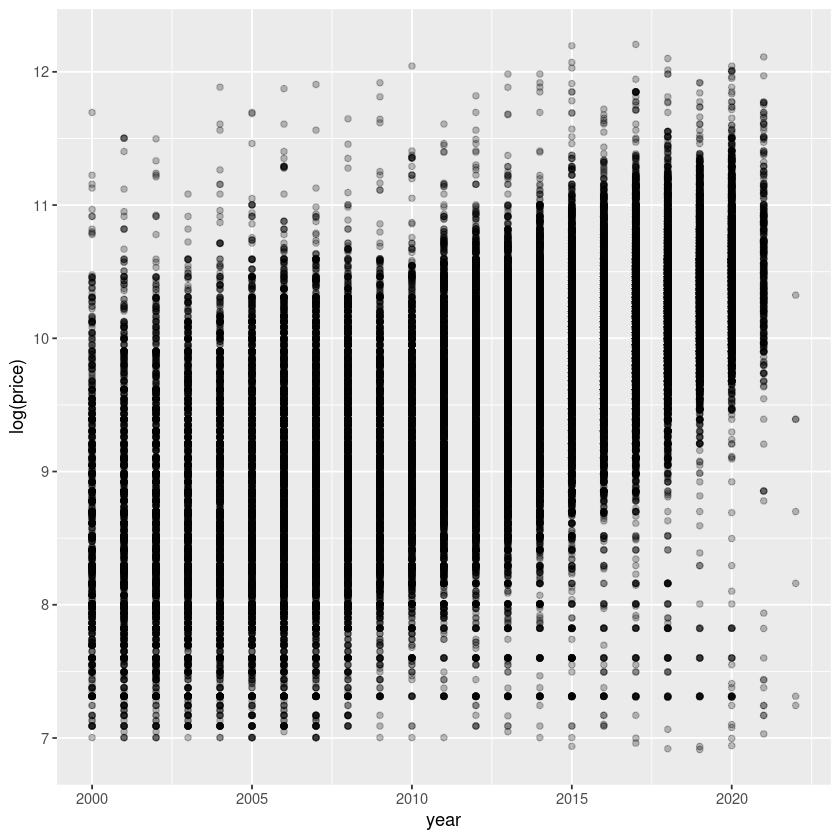

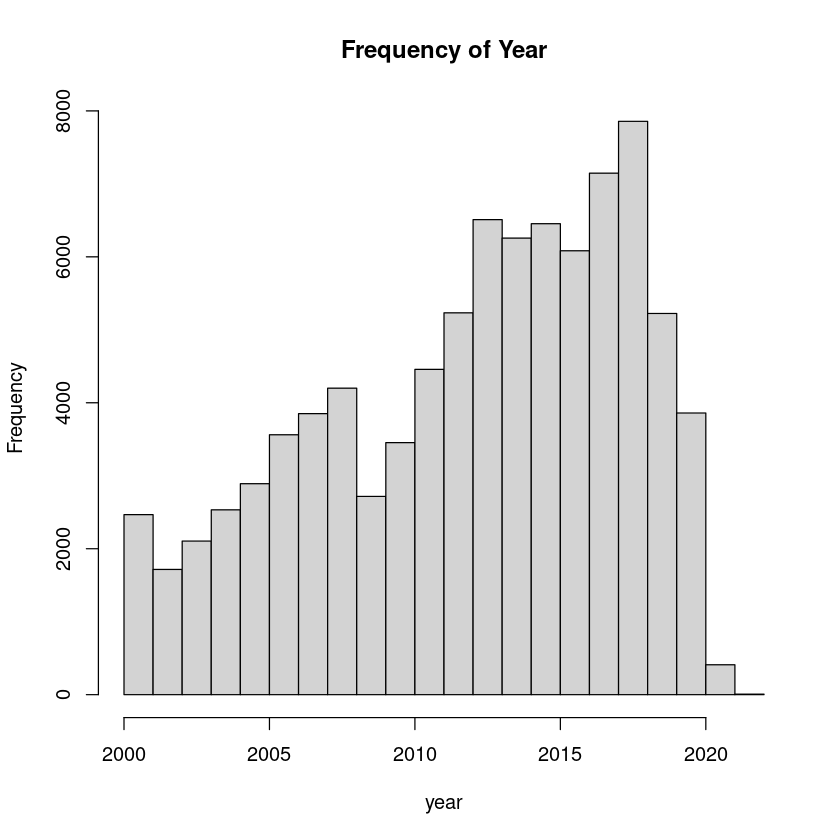

In [14]:
#creating plots for year
ggplot(cleanVehicles, aes(x = year,y = log(price))) + geom_point(alpha = 0.25)
hist(cleanVehicles$year,xlab = 'year', main = 'Frequency of Year')

# Start of Dan's stuff

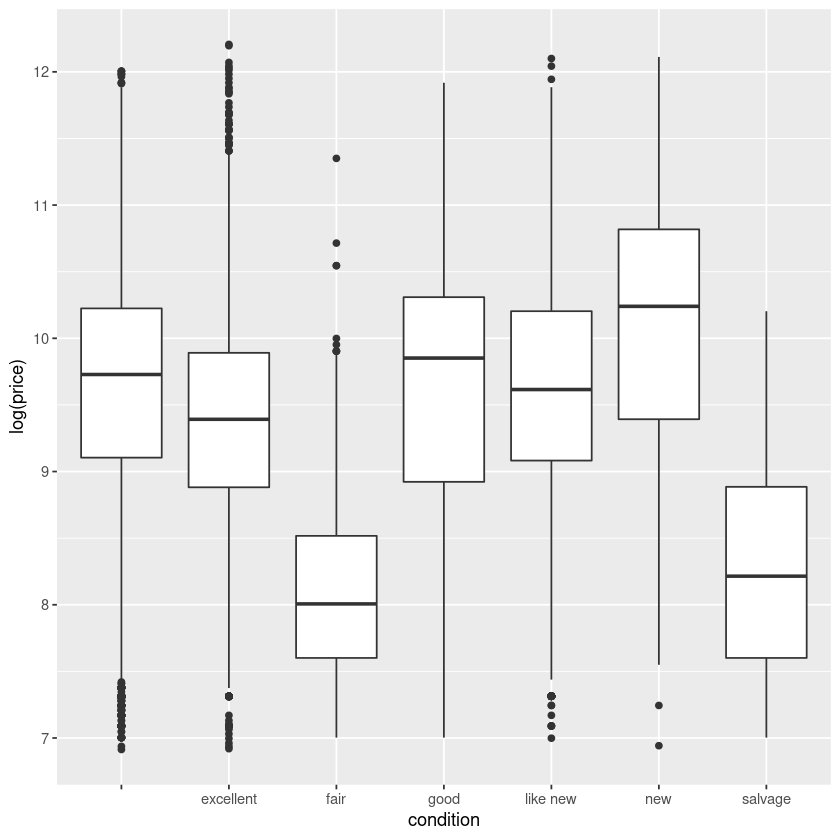

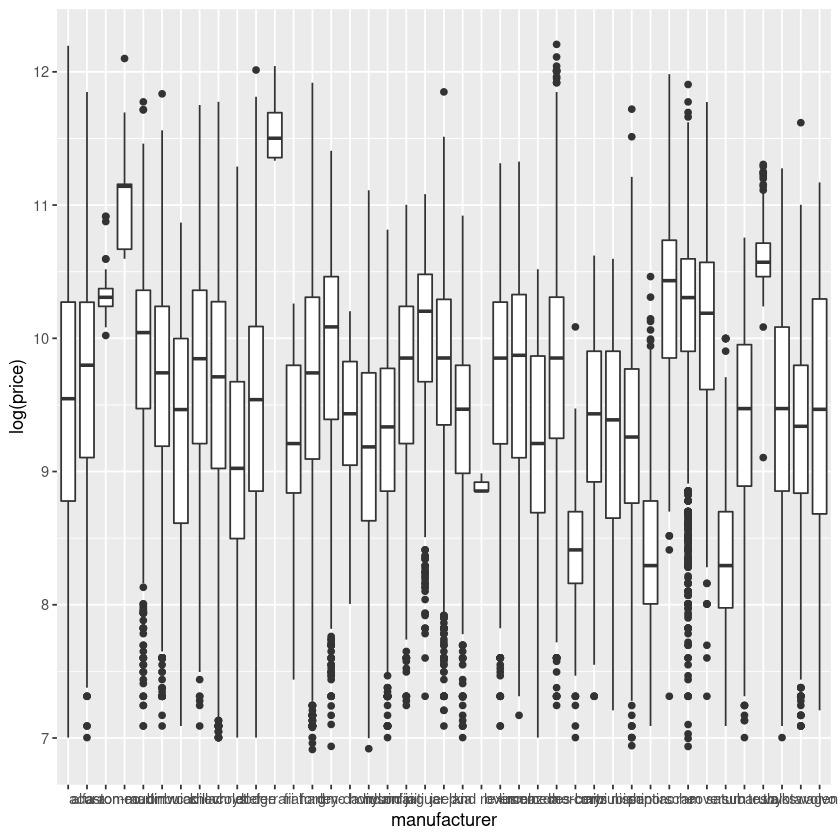

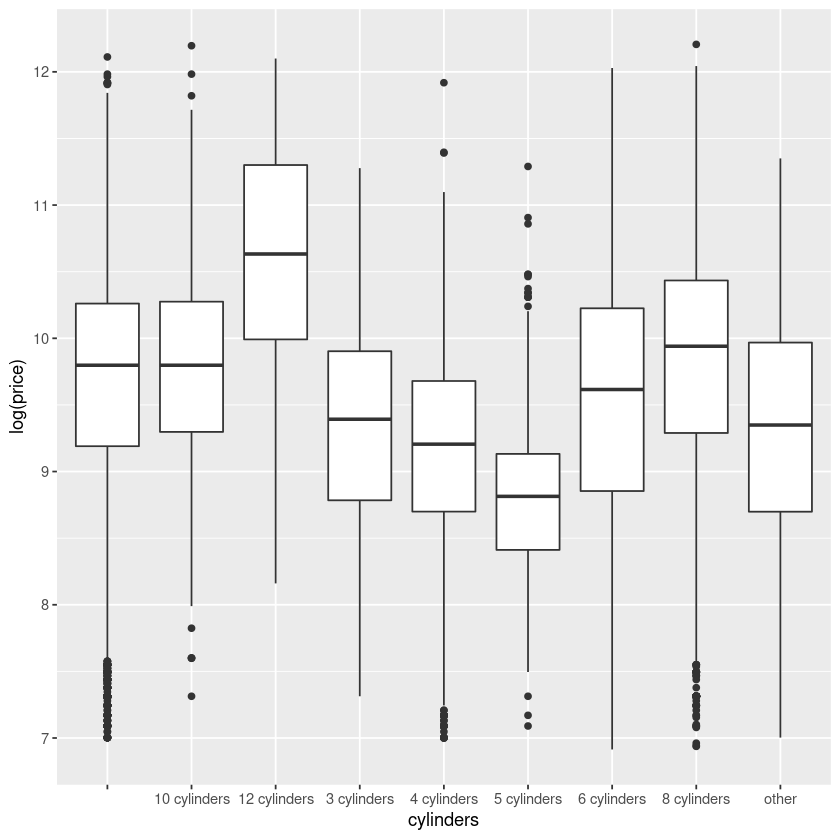

In [15]:
ggplot(aes(x = condition, y = log(price)), data = cleanVehicles)+geom_boxplot()

ggplot(aes(x = manufacturer, y = log(price)), data = cleanVehicles)+geom_boxplot() # too many manufacturers, crowded. pick sample?

ggplot(aes(x = cylinders, y = log(price)), data = cleanVehicles)+geom_boxplot() # technically this data is ordinal; transform and re-do?

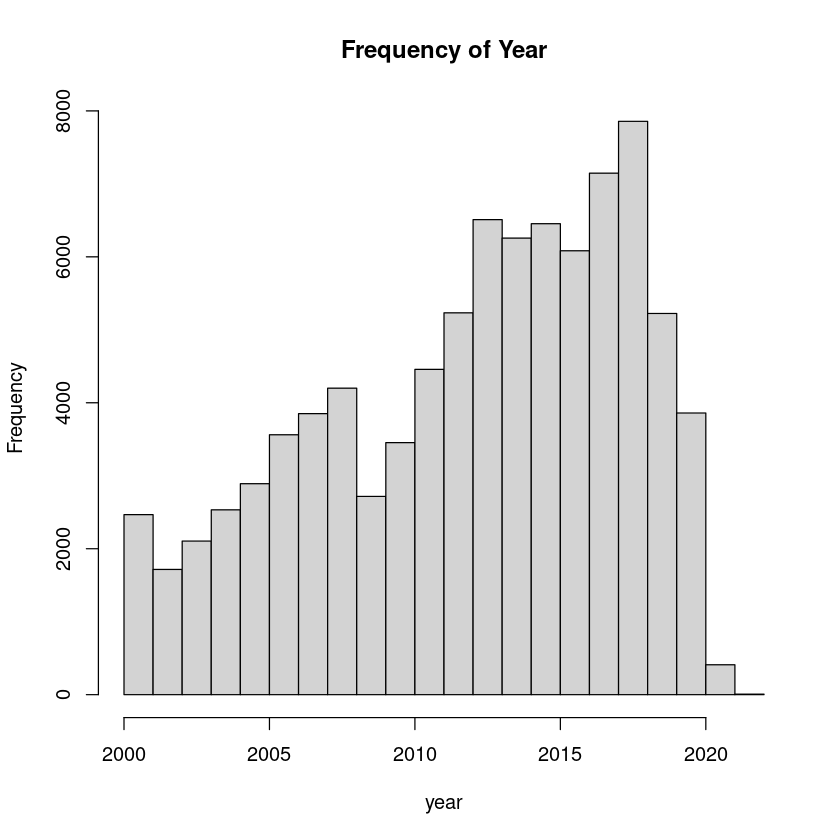

In [16]:
hist(cleanVehicles$year,xlab = 'year', main = 'Frequency of Year')

In [24]:
summary(cleanVehicles)

     price             year         manufacturer       condition    
 Min.   :  1006   Min.   :1900   ford     :14903            :35313  
 1st Qu.:  7400   1st Qu.:2007   chevrolet:11160   excellent:25337  
 Median : 14900   Median :2013   toyota   : 9220   fair     : 1930  
 Mean   : 18324   Mean   :2010   honda    : 5457   good     :28769  
 3rd Qu.: 25990   3rd Qu.:2017   nissan   : 4664   like new : 5522  
 Max.   :199999   Max.   :2022            : 3912   new      :  308  
                                 (Other)  :48011   salvage  :  148  
       cylinders           fuel          odometer            title_status  
            :36657           :  515   Min.   :       0             : 1233  
 6 cylinders:22462   diesel  : 6047   1st Qu.:   40768   clean     :92772  
 4 cylinders:20217   electric:  505   Median :   90100   lien      :  417  
 8 cylinders:16612   gas     :82653   Mean   :  103200   missing   :  185  
 5 cylinders:  475   hybrid  : 1528   3rd Qu.:  139000   parts only:

In [ ]:
ggplot(aes(x = condition, y = log(price)), data = cleanVehicles)+geom_boxplot()

ggplot(aes(x = manufacturer, y = log(price)), data = cleanVehicles)+geom_boxplot() # too many manufacturers, crowded. pick sample?

ggplot(aes(x = cylinders, y = log(price)), data = cleanVehicles)+geom_boxplot() # technically this data is ordinal; transform and re-do?

hist(cleanVehicles$year,xlab = 'year', main = 'Frequency of Year')

summary(cleanVehicles)

In [ ]:
## Get reasonable subset of manufacturers to box plot
cleanVehicles %>% 
  group_by(manufacturer) %>%
  summarise(no_rows = length(manufacturer))

manufacturerCount = cleanVehicles %>% 
  count(manufacturer) %>% 
  filter(n > 1500) # roughly 2%, fairly arbitrary

manufacVehicles = !cleanVehicles$manufacturer %in% manufacturerCount$manufacturer
cleanVehicles2 = cleanVehicles
cleanVehicles2[manufacVehicles, ]$manufacturer <- NA 
# TODO: Figure out how to remove NA values
# filter(cleanVehicles2, manufacturer != NA) 
# drop_na(cleanVehicles2, manufacturer)
# cleanVehicles2$manufacturer <- droplevels(cleanVehicles2$manufacturer)

ggplot(aes(x = manufacturer, y = log(price)), data = cleanVehicles2)+geom_boxplot() 

TODO: Write some functions instead of copying and pasting the same lines of code like some kind of chimpanzee for crying out loud

condition,no_rows
<fct>,<int>
,35313
excellent,25337
fair,1930
good,28769
like new,5522
new,308
salvage,148


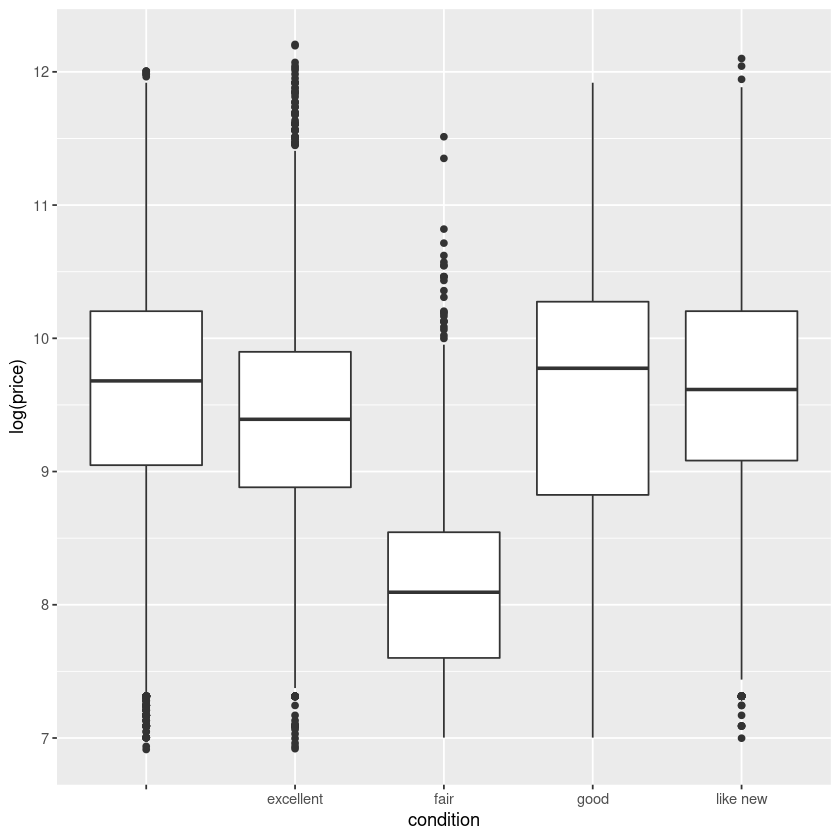

In [26]:
## Subset of vehicles by condition
cleanVehicles %>% 
  group_by(condition) %>%
  summarise(no_rows = length(condition))
## removed "new" because wtf who sells new cars on craigslist (also n was small), removed salvage because n was small
v3 = cleanVehicles %>% filter(condition == "" | condition == "excellent" | condition == "fair"  | condition == "like new" | condition == "good")
ggplot(aes(x = condition, y = log(price)), data = v3)+geom_boxplot()

In [ ]:
## boxplots of remaining categories
ggplot(aes(x = cylinders, y = log(price)), data = cleanVehicles)+geom_boxplot()
ggplot(aes(x = fuel, y = log(price)), data = cleanVehicles)+geom_boxplot()
ggplot(aes(x = transmission, y = log(price)), data = cleanVehicles)+geom_boxplot()
ggplot(aes(x = drive, y = log(price)), data = cleanVehicles)+geom_boxplot()
ggplot(aes(x = type, y = log(price)), data = cleanVehicles)+geom_boxplot()
ggplot(aes(x = paint_color, y = log(price)), data = cleanVehicles)+geom_boxplot()
ggplot(aes(x = state, y = log(price)), data = cleanVehicles)+geom_boxplot()

type,no_rows
<fct>,<int>
,21409
bus,141
convertible,2288
coupe,4677
hatchback,4308
mini-van,1202
offroad,265
other,4677
pickup,8739


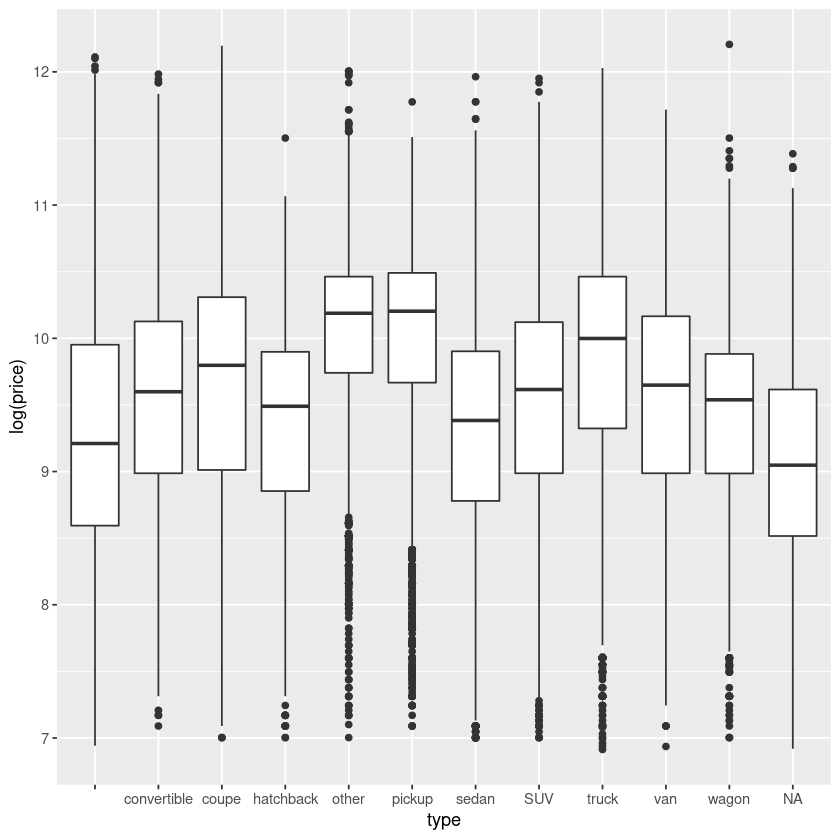

In [27]:
## boxplot of type
cleanVehicles %>% 
  group_by(type) %>%
  summarise(no_rows = length(type))

typeCount = cleanVehicles %>% 
  count(type) %>% 
  filter(n > 1500)

typeVehicles = !cleanVehicles$type %in% typeCount$type
cleanVehicles3 = cleanVehicles
cleanVehicles3[typeVehicles, ]$type <- NA 
ggplot(aes(x = type, y = log(price)), data = cleanVehicles3)+geom_boxplot() 

## TODO: Consider combining categories, obvious ones are mini-van and van, pickup and truck. Could reduce to "car" and "larger vehicles" to see difference and have simple binary 
## NOTE: "Other" seems to be mostly just unspecified from my observation of the raw data, looks like certain sellers just couldn't be fucked, but there were a few motorcycles 

In [ ]:
## Box plot by Fuel Type
cleanVehicles %>% 
  group_by(fuel) %>%
  summarise(no_rows = length(fuel))

v4 = cleanVehicles %>% filter(fuel == "diesel" | fuel == "gas" | fuel == "hybrid")
ggplot(aes(x = fuel, y = log(price)), data = v4)+geom_boxplot()

sqrt(GoodmanKruskal tau) in library(GKtau) can be used for the continuous response versus some categorical features (such as room type) after the response variable has been binned.

The Goodman and Kruskal tau measure is an asymmetric association measure between two categorical variables, based on the extent to which variation in one variable can be explained by the other. This function returns a dataframe with both forward and backward associations. 

In [1]:
install.packages("GoodmanKruskal")

Installing package into ‘/home/daniel/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [ ]:
# bin the response variable
cleanVehicles <- cleanVehicles %>% mutate(price_bins = cut(log(price), breaks = c(7,8,9,10,11,12)))
head(cleanedVehicles, 10)
cleanVehicles%>%group_by(price_bins)%>%count() # excludes 21 rows

library(GoodmanKruskal)
GKtau(cleanVehicles$type, cleanVehicles$fuel)
# GKtauDataframe(cleanVehicles, includeNA = "no") ## WARNING: DO NOT TRY THIS, CRASHES MY JUPYTER KERNEL OR OS. Probably too many combinations + calculations all at once



,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,33590,2014,gmc,good,8 cylinders,gas,57923,other,,pickup,white,al
2,22590,2010,chevrolet,good,8 cylinders,gas,71229,other,,pickup,blue,al
3,39590,2020,chevrolet,good,8 cylinders,gas,19160,other,,pickup,red,al
4,30990,2017,toyota,good,8 cylinders,gas,41124,other,,pickup,red,al
5,15000,2013,ford,excellent,6 cylinders,gas,128000,automatic,rwd,truck,black,al
6,27990,2012,gmc,good,8 cylinders,gas,68696,other,4wd,pickup,black,al
7,34590,2016,chevrolet,good,6 cylinders,gas,29499,other,4wd,pickup,silver,al
8,35000,2019,toyota,excellent,6 cylinders,gas,43000,automatic,4wd,truck,grey,al
9,29990,2016,chevrolet,good,6 cylinders,gas,17302,other,4wd,pickup,red,al


price_bins,n
<fct>,<int>
"(7,8]",3255
"(8,9]",20684
"(9,10]",35757
"(10,11]",27783
"(11,12]",1427
NA,21


xName,yName,Nx,Ny,tauxy,tauyx
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
cleanVehicles$type,cleanVehicles$fuel,14,6,0.064,0.02
